In [1]:
import keras
from sklearn import metrics
import pandas as pd
import time

benchmark = "all"
usecols = []

# Column to load according to benchmark
# data range is 0 to 18 for SUSY.
# 8 low-level features & 10 high-level features
# and the column 0 is for the label
all_n = 18  # total features
raw_n = 8  # raw features
high_n = 10  # highlevel features

# validation split: number of instances used for validation

validation_split = 20 / 100

# list(range(a, b+1)) returns an array of [a, ..., b]
# usecols points to the columns to use
# column 0 is always loaded
if benchmark is "raw":
    # [1, .., 8] ===> 8 items
    usecols = [0] + list(range(1, raw_n + 1))
    input_n = raw_n
elif benchmark is "highlevel":
    # [9, ..., 18] ===> 10 items
    usecols = [0] + list(range(raw_n + 1, all_n + 1))
    input_n = high_n
elif benchmark is "all":
    # [1, ..., 18] ===> 18 items
    usecols = [0] + list(range(1, all_n + 1))
    input_n = all_n

# ONLY for Split (chunk) datas "split_datas\SUSY\"
# DELETE if using the original data from UCI
# usecols = [i + 1 for i in usecols]
print(benchmark)

if __name__ == '__main__':
    # Data
    print("Loading data")
    t = time.time()
    tables = []
    datas = pd.read_csv(filepath_or_buffer=r"F:\Documents\Memoir\Datas\SUSY.csv.gz",
                        low_memory=True, compression="gzip", usecols=usecols,
                        na_filter=False)

    print("Loading Time : {:6.6}s".format(time.time() - t))

    x = datas.iloc[:, 1:].as_matrix()
    y = datas.iloc[:, 0].as_matrix()

    # Model
    # model_path = sys.argv[1]
    model_path = r'F:\Documents\Memoir\Datas\process\saves\SUSY\\' + \
                 'TANH_model_SUSY_layers4_Epoch20_width128_do0.01_all.h5'
    model = keras.models.load_model(filepath=model_path)

    # evaluate
    # ev = model.evaluate(x, y)
    # print('evaluate ', ev[0], ev[1])

    # predict
    pred = model.predict(x, verbose=1)[:, 0]

    # Compute AUC-ROC (Area Under Curve - Receiver Operating Characteristics)
    # fpr (false positive recall), tpr (true positive recall)
    fpr, tpr, thresholds = metrics.roc_curve(y, pred)
    auc = metrics.auc(fpr, tpr)
    print('\n AUC:', auc)


Using TensorFlow backend.


all
Loading data
Loading Time : 38.0417s
4999999/4999999 [==============================] - 125s   

 AUC: 0.876739342211


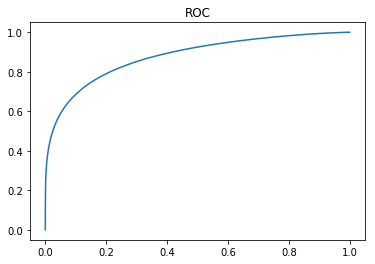

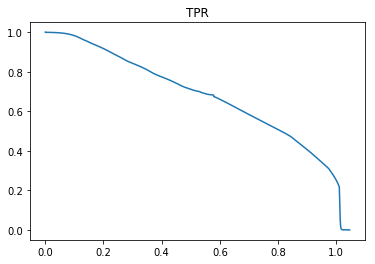

In [8]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.plot(fpr, tpr)
plt.title('ROC')
fig.savefig(r'F:\ROC')
fig1 = plt.figure()
plt.plot(thresholds, tpr)
plt.title('TPR')
fig1.savefig(r'F:\tpr')

In [13]:
path = r'F:\Documents\Memoir\Datas\process\predictions\PREDICTIONS_'
name = r'TANH_model_SUSY_layers4_Epoch20_width128_do0.01_all' + '.csv'
pd.DataFrame(pred).to_csv(path + name, header=False, index=False)

In [35]:
pd.DataFrame(y).to_csv(r'F:\Documents\Memoir\Datas\process\predictions\label.csv', 
                       header=False, index=False, float_format='{.4f}'.format())

IndexError: tuple index out of range